In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
import tensorflow as tf
from keras.models import load_model

image_size = [224, 224]

train_path = './Data/Train'
test_path = "./Data/Test"

vgg = VGG16(input_shape = image_size + [3], weights='imagenet', include_top=False)

#Let's not train on the existing weights
for layer in vgg.layers:
    layer.trainable=False

# Obtain the number of classes. Since we have 3 people to be identified we get 3 classes
folders = glob("./Data/Train/*")

x = Flatten()(vgg.output)

prediction = Dense(len(folders), activation='softmax')(x)

# Create the model object
model = Model(inputs=vgg.input, output=prediction)

model.summary() # Gives us the summary of the entire network ranging from the layers and the parameters.

# Mention what cost, optimizers are to be used and obtain the accuracy metric
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam', 
    metrics=['accuracy']
)

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(
    rescale=1./255,
)

train_set = train_datagen.flow_from_directory(
    './Data/Train',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
)

test_set = train_datagen.flow_from_directory(
    './Data/Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
)

# Fit the model
fits = model.fit_generator(
    train_set,
    validation_data=test_set,
    epochs=3,
    steps_per_epoch=len(train_set),
    validation_steps=len(test_set),
)


Using TensorFlow backend.
E:\Anaconda\envs\ML\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

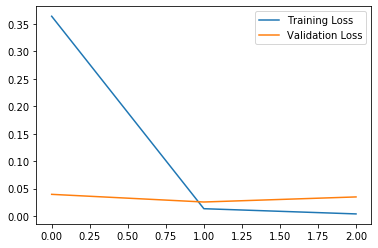

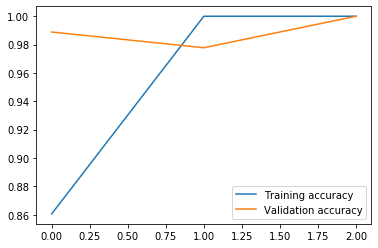

<Figure size 432x288 with 0 Axes>

In [2]:
# Plot the loss of the model
plt.plot(fits.history['loss'], label='Training Loss')
plt.plot(fits.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss2')

# Plot the accuracy of the model
plt.plot(fits.history['accuracy'], label='Training accuracy')
plt.plot(fits.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc2')

# Save the model
model.save('facerecognition_first_modelvgg16.h5')